In [1]:
import pandas as pd
import pickle
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
PATH=r'F:\All data\movie genre\kaggle_movie_train.csv'

In [3]:
df=pd.read_csv(PATH)

In [4]:
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [5]:
mapper= {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}

(array([6824., 2941., 8873., 2392.,    0.,  613.,  270.,   63.,  456.,
         147.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

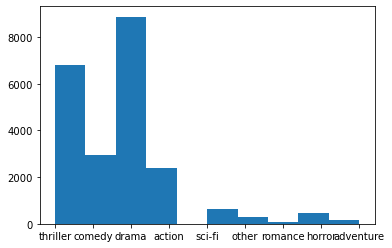

In [6]:
plt.hist(df['genre'])

In [7]:
df['genre']=df['genre'].map(mapper)

(array([ 270., 2392.,  147., 2941.,    0., 8873.,  456.,   63.,  613.,
        6824.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

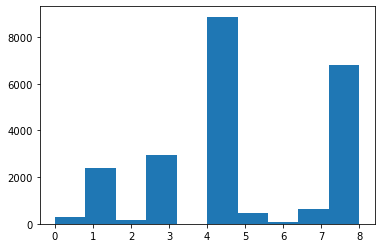

In [8]:
plt.hist(df['genre'])

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
corpus=[]
ps=PorterStemmer()
sw=set(stopwords.words('english'))

In [11]:
for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in sw]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv=CountVectorizer(max_features=10000,ngram_range=(1,2))
X=cv.fit_transform(corpus).toarray()
y=df['genre'].values

In [19]:
pickle.dump(cv, open(r'F:\All data\movie genre\cv-transform.pkl', 'wb'))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [21]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [22]:
filename = r'F:\All data\movie genre\'movie-genre-mnb-model.pkl'
pickle.dump(nb_classifier, open(filename, 'wb'))

In [24]:
nb_classifier.score(X_test,y_test)

0.9134189548272807

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [26]:
yhat_classes=nb_classifier.predict(X_test)

In [27]:
yhat_classes

array([1, 4, 1, ..., 8, 4, 8], dtype=int64)

In [28]:
accuracy = accuracy_score(y_test, yhat_classes)

In [29]:
accuracy

0.9134189548272807

In [31]:
precision = precision_score(y_test, yhat_classes,average=None)

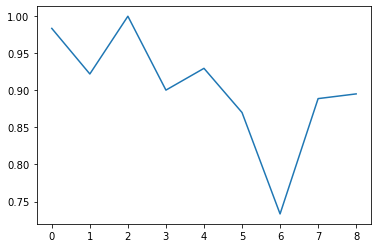

In [36]:
plt.plot(precision)

In [35]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average=None)

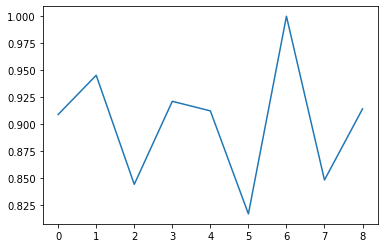

In [38]:
plt.plot(recall)

In [40]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average=None)

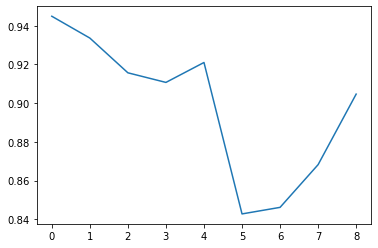

In [42]:
plt.plot(f1)

In [45]:
matrix = confusion_matrix(y_test, yhat_classes)

In [46]:
print(matrix)

[[  60    1    0    0    4    1    0    0    0]
 [   0  450    0    8    8    0    0    0   10]
 [   0    2   38    0    3    0    0    0    2]
 [   0    6    0  515   20    0    0    1   17]
 [   1   20    0   27 1667    5    3    5   99]
 [   0    1    0    1    8   67    0    0    5]
 [   0    0    0    0    0    0   11    0    0]
 [   0    3    0    2    7    0    0  112    8]
 [   0    5    0   19   76    4    1    8 1205]]
